In [5]:
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image

In [6]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()

In [7]:
xtrain.shape

(60000, 28, 28)

In [8]:
win = cv2.namedWindow('default')
img = cv2.imread('test_img.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('default', xtrain[0])

cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
xtrain.min(), xtrain.max()

(0, 255)

In [5]:
xtrain_norm = xtrain.reshape(-1, 28, 28, 1)/255
xtest_norm = xtest.reshape(-1, 28, 28, 1)/255
xtest_norm.shape

(10000, 28, 28, 1)

In [6]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
# model0 = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
#     tf.keras.layers.MaxPool2D(),

#     tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
#     tf.keras.layers.MaxPool2D(),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation = 'relu'),
#     tf.keras.layers.Dense(10, activation = 'softmax')
# ])
# # callback = tf.keras.callbacks.TensorBoard(log_dir = f'/log/{}')

# model0.compile(
#     loss = tf.keras.losses.SparseCategoricalCrossentropy(),
#     optimizer = tf.keras.optimizers.Adam(),
#     metrics = ['accuracy']
# )
# model0.fit(xtrain_norm, ytrain, epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1177 - accuracy: 0.9642
Epoch 2/2
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0389 - accuracy: 0.9876


In [11]:
# model0.save('CNN.h5')

In [9]:
# model0.summary()

## Adding Right and Left Shifted images to the Dataset

In [10]:
import matplotlib.pyplot as plt
import numpy as np

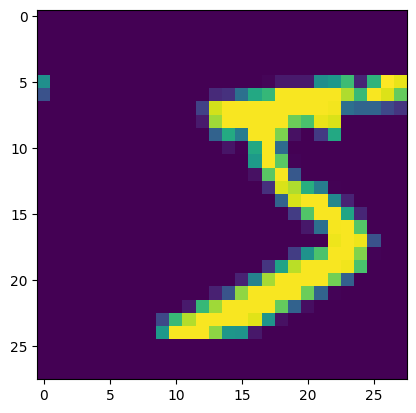

In [11]:
plt.imshow(np.roll(xtrain[0], 5, axis = 1))

In [27]:
xtrain_shifted = np.roll(xtrain, 5, axis = 2)

In [26]:
xtrain_norm.shape

(60000, 28, 28, 1)

In [28]:
xtrain_new = np.insert(xtrain, 1, xtrain_shifted[0], axis = 0)

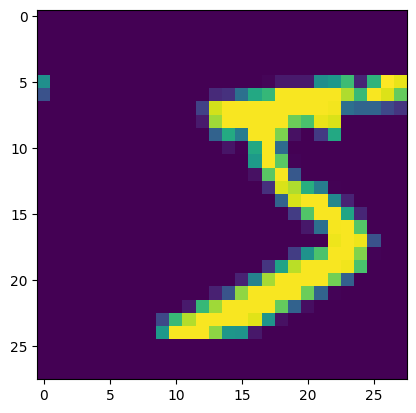

In [35]:
plt.imshow(xtrain_new[1])

In [11]:
xtrain_rshifted = np.roll(xtrain, 5, axis = 2)
xtrain_lshifted = np.roll(xtrain, -5, axis = 2)

In [13]:
# xtrain_new = xtrain.copy()
# i = j = 0
# while i < len(xtrain):
#     np.insert(xtrain_new, j + 1, xtrain_lshifted[i], axis = 0)
#     np.insert(xtrain_new, j + 2, xtrain_rshifted[i], axis = 0)
#     j += 3
#     i += 1

In [18]:
# index = np.array([[x + 1, x + 2] for x in range(0, len(xtrain), 3)])
# index = index.reshape(-1)
index = np.array([[x, x] for x in range(1, 60001)]).reshape(-1)
index

array([    1,     1,     2, ..., 59999, 60000, 60000])

In [19]:
values = np.array([[xtrain_lshifted[i], xtrain_rshifted[i]] for i in range(len(xtrain))]).reshape(-1, 28, 28)

In [20]:
values.shape

(120000, 28, 28)

In [21]:
values = values.reshape(-1, 28, 28)

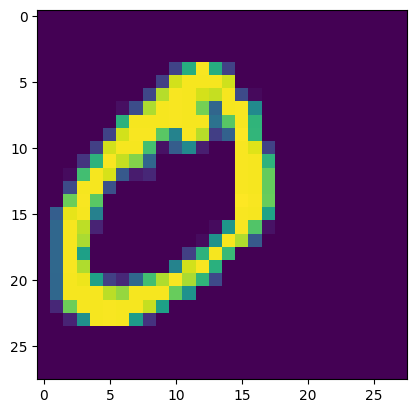

In [46]:
plt.imshow(values[2])

In [47]:
index.shape

(120000,)

In [22]:
xtrain_new = xtrain.copy()
xtrain_new = np.insert(xtrain_new, index, values, axis = 0)

In [23]:
xtrain_new.shape

(180000, 28, 28)

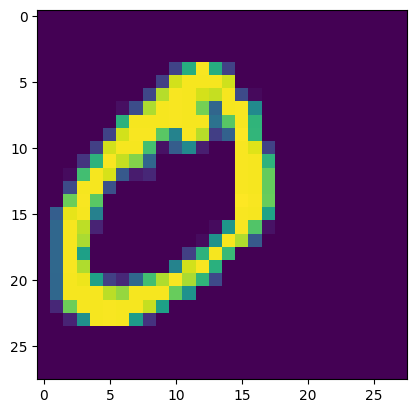

In [28]:
plt.imshow(xtrain_new[4])

In [30]:
yindex = np.array([[x, x] for x in range(1, 60001)]).reshape(-1)
yindex

array([    1,     1,     2, ..., 59999, 60000, 60000])

In [31]:
ytrain_new = np.array([[x, x, x] for x in ytrain]).reshape(-1)
ytrain_new

array([5, 5, 5, ..., 8, 8, 8], dtype=uint8)

In [38]:
xtrain_new_norm = xtrain_new/255

(<matplotlib.image.AxesImage at 0x1fd8a06e790>, 0)

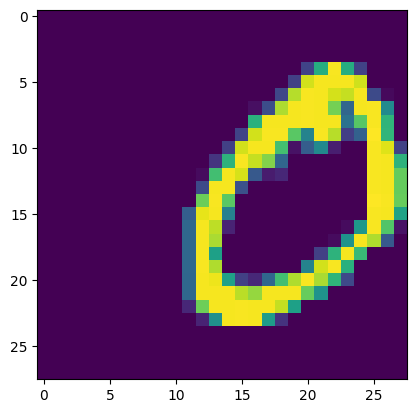

In [39]:
i = 5
plt.imshow(xtrain_new_norm[i]), ytrain_new[i]

In [43]:
xtrain_new_norm = xtrain_new_norm.reshape(-1, 28, 28, 1)
xtrain_new_norm.shape

(180000, 28, 28, 1)

In [45]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
# callback = tf.keras.callbacks.TensorBoard(log_dir = f'/log/{}')

model1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)
model1.fit(xtrain_new_norm, ytrain_new, epochs = 2)

Epoch 1/2
5625/5625 [==============================] - 220s 39ms/step - loss: 0.1053 - accuracy: 0.9673
Epoch 2/2
5625/5625 [==============================] - 215s 38ms/step - loss: 0.0378 - accuracy: 0.9882


In [46]:
model1.save('CNN_extended_dataset.h5')